# Bayesian Hierarchical Model based on asteroseismology paper

The oscillatory signature of the second ionization zone of helium in the second differences can be described by the following function:

$\Delta_2\omega_{n,l}=A_{n,l}exp(-2b^{2}\omega_{n,l}^2)cos[2(\tau_{HeII}\omega_{n,l}+d)]+K$

where $\omega_{n,l}$ and $\Delta_2\omega_{n,l}$ are the angular versions of $\nu_{n,l}$ (the frequency of the nth overtone of the p mode with spherical harmonic degree l) and $\Delta_2\nu_{n,l}$ (the second difference in
the p-mode frequencies) respectively, $A$ is the amplitude of the oscillatory component, $\tau_{HeII}$ is the acoustic depth of the second ionization zone of helium, $b$ is the characteristic width of the region, $d$ is a constant that accounts for the phase of the signal, and $K$ is a constant offset.

(-17.95, 376.95)

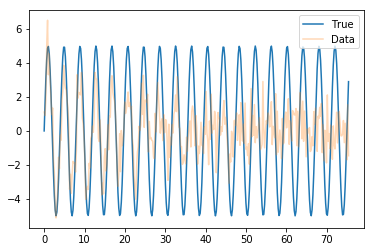

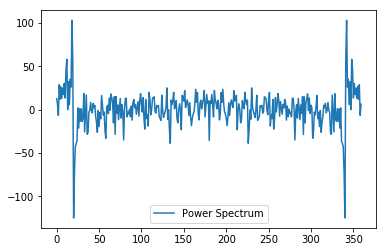

In [19]:
import numpy as np
import scipy as sp
import matplotlib.pyplot as plt

N = 360
nint = 24
A = 5
freq = 10.0/(2*np.pi)

t = np.linspace(0, np.pi*nint, N)
true = A*np.sin(t*freq)

sigma = 1
data = true*np.exp(-0.05*t) + np.random.randn(N)

fig, ax = plt.subplots()
ax.plot(t, true, label='True')
ax.plot(t, data, alpha=0.3, label='Data')
ax.legend()

fft1 = np.fft.fft(data)
fft2 = np.fft.fft(true)

fig, ax = plt.subplots()
ax.plot(fft1, label='Power Spectrum')
ax.legend()
plt.xlim()

In [20]:
code = '''
functions {
    real sin(real freq, real A, real t){
        return A*sin(freq*t);
    }
}
data {
    int N;
    real t;
    real f[N];
}
parameters {
    real<lower=0> freq;
    real A;
}
model {
    vector[N] mod;
    freq ~ normal(1.2, 1.0);
    A ~ normal(5.0, 1.0);
}
'''
import pystan
sm = pystan.StanModel(model_code=code)

ValueError: Failed to parse Stan model 'anon_model_fbee3fb5b0bd19c231b1b6252240bcdc'. Error message:
SYNTAX ERROR, MESSAGE(S) FROM PARSER:

Too many indexes, expression dimensions=0, indexes found=1
  error in 'unknown file name' at line 21, column 35
  -------------------------------------------------
    19:     A ~ normal(5.0, 1.0);
    20:     for(i in 1:N){
    21:         mod[i] = sin(freq, A, t[i])
                                          ^
    22:     }
  -------------------------------------------------



In [73]:
stan_data = {'N': len(f),
             'f': f, 
             'freq': freq}
start = {'freq' : 5.0}
nchains = 4
fit = sm.sampling(data=data, iter=1000, chains=nchains, init=[start for n in range(nchains)])

AttributeError: 'numpy.ndarray' object has no attribute 'items'